In [4]:
import pandas as pd
import numpy as np
import statistics
from datetime import datetime
import datetime
import random
import itertools
from scipy.stats import norm
#import seaborn as sns
import math
import random
import sklearn
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [83]:
#Lauras path
#data= pd.read_csv(r'C:\Users\moreno.l.5\Procter and Gamble\Idigoras, Anne - Project\Shipments\total shipments.csv')
#Annes path
data= pd.read_csv(r'C:\Users\idigoras.a\OneDrive - Procter and Gamble\05. Trainings&Acces\FODS 3\Project\Shipments\total shipments.csv')
#data = data[data['Category'] == 'CHAMPUS']
#data = data.drop(columns=['Sub Sector','Category'])
#data = data.groupby('Date').sum()
data = data.drop(columns=['Category'])
categories = data['Sub Sector'].unique()
print(categories)



['BABY CARE' 'DISH WASHING' 'FABRIC CARE' 'FEMININE CARE' 'GROOMING'
 'HAIR CARE' 'HOME CARE' 'ORAL CARE' 'PERSONAL CARE' 'PHC CARE'
 'SKIN CARE']


In [84]:
data = data.loc[data['Sub Sector'] == 'DISH WASHING']
data = data.groupby(['Date', 'Sub Sector']).sum()
data = data.reset_index()
data = data[data['Date']!= '2021-03']
data.head()  

,Date,Sub Sector,Shipment MSU Internal
1,2021-04,DISH WASHING,41.6958
2,2021-05,DISH WASHING,45.3879
3,2021-06,DISH WASHING,50.5468
4,2021-07,DISH WASHING,61.9202
5,2021-08,DISH WASHING,56.9065


In [85]:
# Creating date range in correct format
idx = pd.to_datetime(data['Date'], format='%Y-%m')

# Creating series with correct dates and units sold
ts = pd.Series(data['Shipment MSU Internal'].tolist(), index=idx)

ts

Date
2021-04-01    41.6958
2021-05-01    45.3879
2021-06-01    50.5468
2021-07-01    61.9202
2021-08-01    56.9065
2021-09-01    47.0503
2021-10-01    48.8056
2021-11-01    60.0513
2021-12-01    47.7435
2022-01-01    51.9445
2022-02-01    33.1024
2022-03-01    46.7407
2022-04-01    36.1582
2022-05-01    37.5685
2022-06-01    55.7277
2022-07-01    36.8897
2022-08-01    45.8626
2022-09-01    57.5664
2022-10-01    35.4209
2022-11-01    33.5976
2022-12-01    36.4431
2023-01-01    46.8065
2023-02-01    37.0357
2023-03-01    38.9020
2023-04-01    42.6031
2023-05-01    35.8874
2023-06-01    35.2191
2023-07-01    42.0326
2023-08-01    63.2170
2023-09-01    44.5447
2023-10-01    33.8275
2023-11-01    45.0087
2023-12-01    35.4061
2024-01-01    51.0222
2024-02-01    36.9522
2024-03-01    28.5705
dtype: float64

In [86]:
import matplotlib.pylab as plt
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from pylab import rcParams

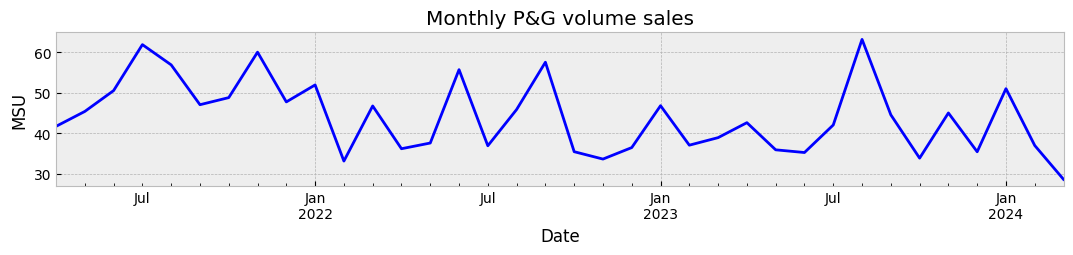

In [87]:
plt.style.use('bmh')

ax = ts.plot(color = 'blue', figsize=(13,2))

ax.set_ylabel('MSU')
ax.set_title('Monthly P&G volume sales')

plt.show()

In [88]:
ts.index

DatetimeIndex(['2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01',
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

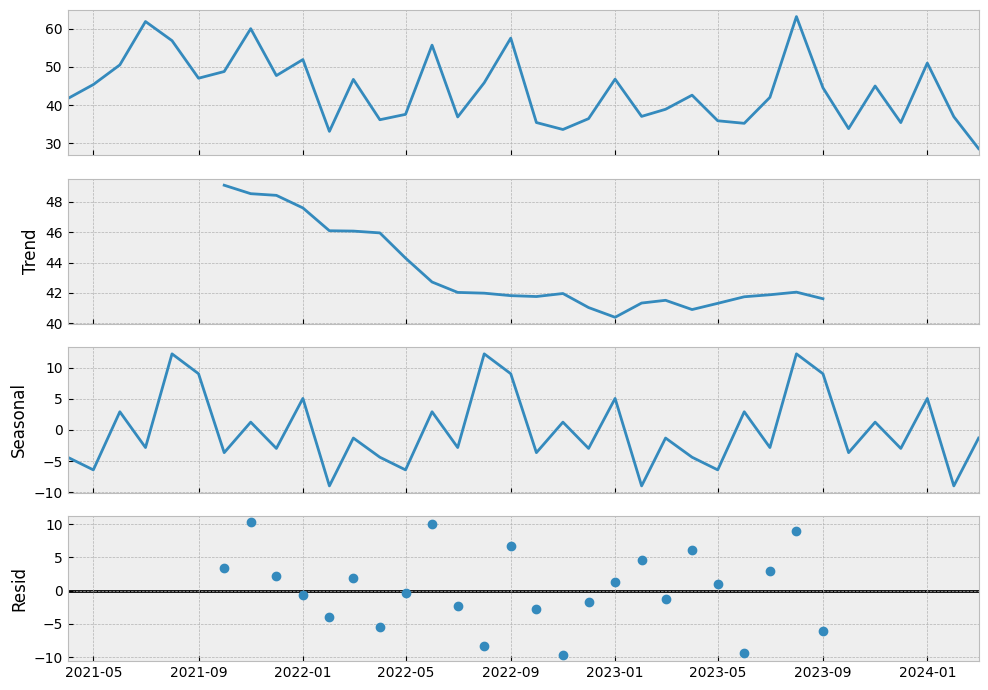

In [89]:
ts = ts.asfreq(pd.infer_freq(ts.index))

rcParams['figure.figsize'] = 10, 7

# Use the seasonal_decompose function
decomposition = sm.tsa.seasonal_decompose(ts)

fig = decomposition.plot()

plt.show()

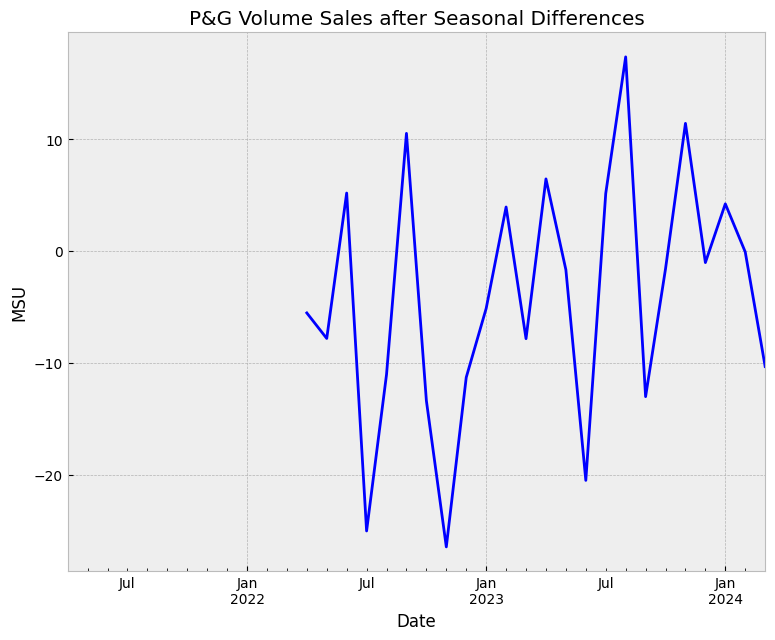

In [90]:
# Use the diff() function to resolve the seasonality first
season_diff = ts.diff(12)

ax = season_diff.plot(color = 'blue', figsize=(9,7))

ax.set_ylabel('MSU')

ax.set_title('P&G Volume Sales after Seasonal Differences')

plt.show()

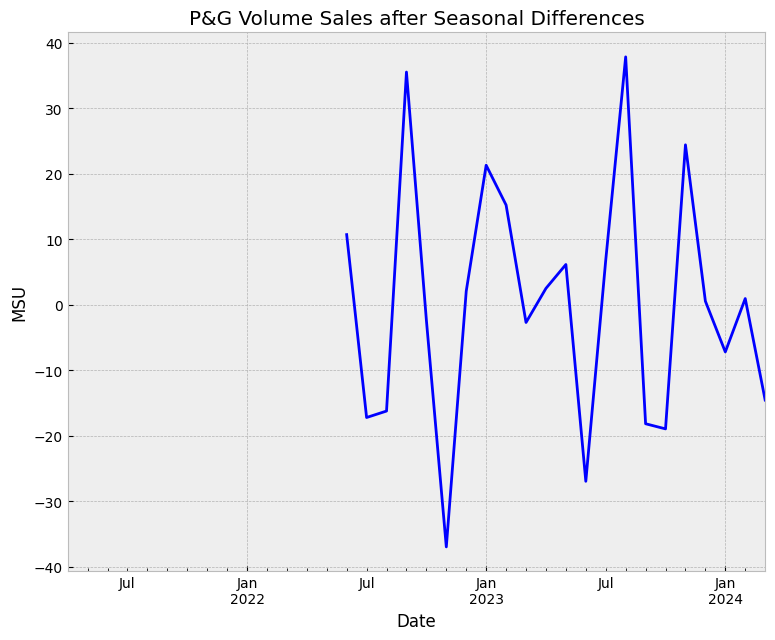

In [91]:
# Use the diff() function to resolve the trend
trend_and_season_diff = season_diff.diff(2)

ax = trend_and_season_diff.plot(color = 'blue', figsize=(9,7))

ax.set_ylabel('MSU')

ax.set_title('P&G Volume Sales after Seasonal Differences')

plt.show()

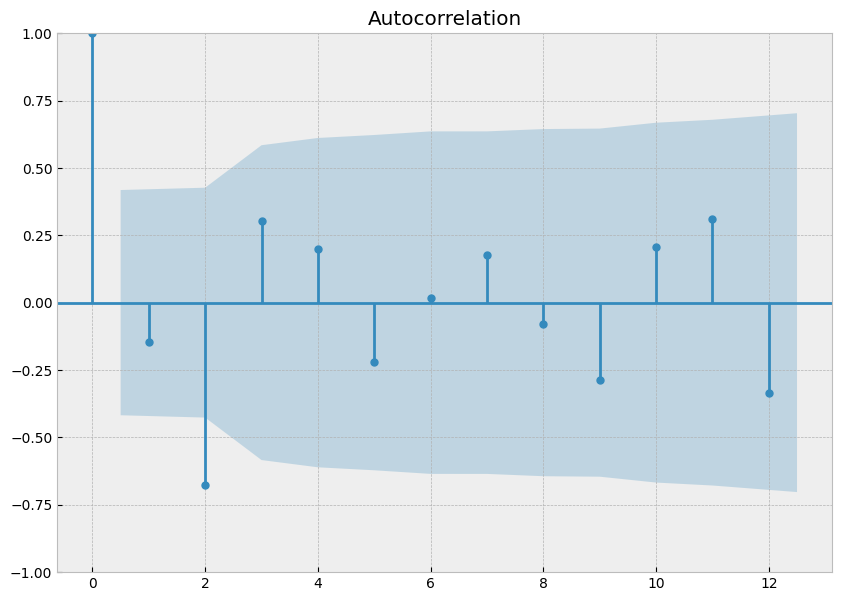

In [92]:
#Remember that the correlation functions cannot handle missing values which you might have after differencing.
season_diff = season_diff.dropna()
trend_and_season_diff = trend_and_season_diff.dropna()

# Use a function from the tsaplots module of statsmodels
fig = tsaplots.plot_acf(trend_and_season_diff, lags = 12)

plt.show()

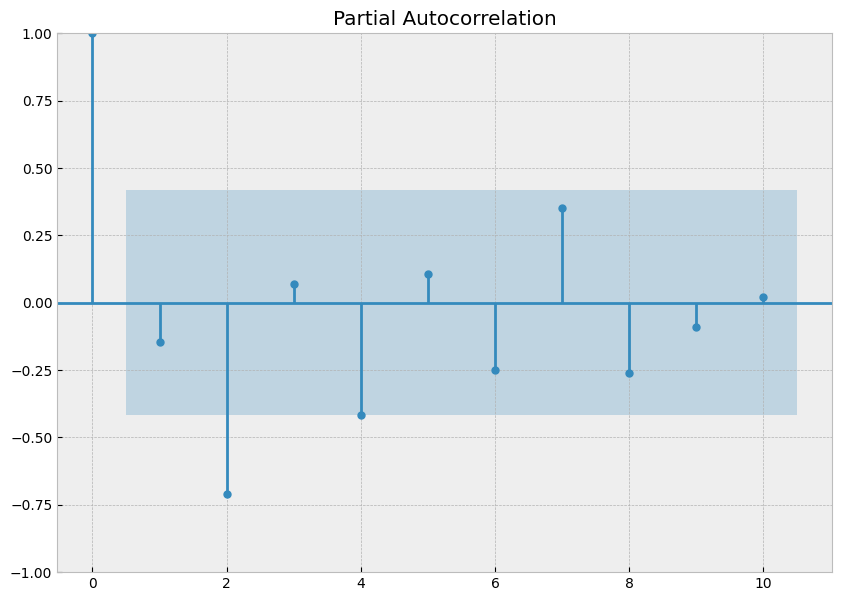

In [93]:
# Use a function from the tsaplots module of statsmodels
fig = tsaplots.plot_pacf(trend_and_season_diff, lags = 10)

plt.show()

In [94]:
# Fill in some possible values for p,d,q, P,D,Q,S
mod_ld = SARIMAX(ts, order=(1,1,0), seasonal_order=(1,1,0,12))

res_ld = mod_ld.fit()
print(res_ld.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   36
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 -91.930
Date:                            Tue, 14 May 2024   AIC                            189.860
Time:                                    12:38:58   BIC                            193.266
Sample:                                04-01-2021   HQIC                           190.716
                                     - 03-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2873      0.230     -1.251      0.211      -0.737       0.163
ar.S.L12      -0.6584      0.209   